# **Libraries** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from mpl_toolkits.mplot3d import Axes3D


# **Constants**

In [ ]:
co=299792458.0         # speed of light [m/s]
n1=1.0
n2=1.5
c1=co/n1
c2=co/n2

Ro=7.5
t=50.0e-3
D=4.0e-2
d=2.0e-2

# **Functions**

In [ ]:
## calculate distances
#  from coil to outer surface
def lcoil2outersurface(fi,d,Ro):
    return d+0.5*Ro*np.power(fi,2)
#  from outer diametre to inner diametre - within material x1
def lmat(a,Ro,t):
    return Ro*(1-0.5*np.power(a,2))-np.sqrt(np.power(Ro-t,2)-np.power(Ro*a,2))
#  from outer diametre to coil/antenna
def louter2coil(u,delta,d,Ro):
    lx=d+0.5*Ro*np.power(u,2)
    return lx*(1-0.5*np.power(delta+u,2))

## calculate angles
def alpha(fi,n1,n2):
    return (n1/n2)*fi
def omega(fi,a,l,Ro):
    return (Ro*fi-l*(fi-a))/(Ro*(1-0.5*np.power(fi,2))-l*(1-0.5*np.power(fi-a,2)))
def vita(w,fi,a):
    return w-fi+a
def gamma(b,l,Ri):
    return (Ri*b)/(l+Ri*(1-0.5*np.power(b,2)))
def upsilon(b,g,w):
    return b-g+w
def delta(g,n1,n2):
    return (n2/n1)*g



# **Fi constraint**

In [ ]:
fi_abs=D/(2*Ro)

# **Geometrical Calculations**

## **Calculate angles & distance**

In [ ]:
fi=np.linspace(-fi_abs,fi_abs,num=1000)
### 1st peak
## Medium 1
#  from coil to outer surface
lc2o_01=lcoil2outersurface(fi,d,Ro)
#  from outer surface to coil
lo2c_01=louter2coil(fi,0,d,Ro)

### 2nd peak
## Medium 1
#  from coil to outer surface
lc2o=lcoil2outersurface(fi,d,Ro)
## Medium 2
#  from outer surface to inner surface 
a=alpha(fi,n1,n2)
lo2i=lmat(a,Ro,t)
w=omega(fi,a,lo2i,Ro)
#  from inner surface to outer surface 
b=vita(w,fi,a)
li2o=lo2i
g=gamma(b,li2o,Ro-t)
u=upsilon(b,g,w)
## Medium 1
#  from outer surface to coil
de=delta(g,n1,n2)
lo2c=louter2coil(u,de,d,Ro)

## **Calculate dt**

In [ ]:
### 1st peak
## Medium 1
#  from coil to outer surface
dtc2o_01=lc2o_01/c1
#  from outer surface to coil
dto2c_01=lo2c_01/c1


### 2nd peak
## Medium 1
#  from coil to outer surface
dtc2o=lc2o/c1
## Medium 2
#  from outer surface to inner surface 
dto2i=lo2i/c2
#  from inner surface to outer surface 
dti2o=li2o/c2
## Medium 1
#  from outer surface to coil
dto2c=lo2c/c1

## **Calculate dt per peak**

In [ ]:
### 1st peak
dt1=dtc2o_01+dto2c_01

### 2nd peak
dt2=dtc2o+dto2i+dti2o+dto2c

# **FMWC**

## **Example**

### *Step 1: Radar parameters setting*

In [41]:
#Radar parameters setting
maxR = 200 #Maximum range
rangeRes = 1 #Range resolution 
maxV = 70 #Maximum speed
fc = 77e9 #Carrier frequency
c = 3e8 #Speed of light

r0 = 100 #Target distance
v0 = 70 #Target speed

B = c/(2*rangeRes) #Bandwidth
Tchirp = 5.5*2*maxR/c #Chirp time
endle_time = 6.3e-6 
slope = B/Tchirp #Chirp slope
f_IFmax = (slope*2*maxR)/c #Maximum IF frequency
f_IF = (slope*2*r0)/c #Current IF frequency

Nd = 128 #Number of chirp
Nr = 1024 #Numnber ADC sampling points
vres = (c/fc)/(2*Nd*(Tchirp+endle_time)) #Speed resolution 
Fs = Nr/Tchirp #Sampling rate

### *Step 2: Signal of Tx*

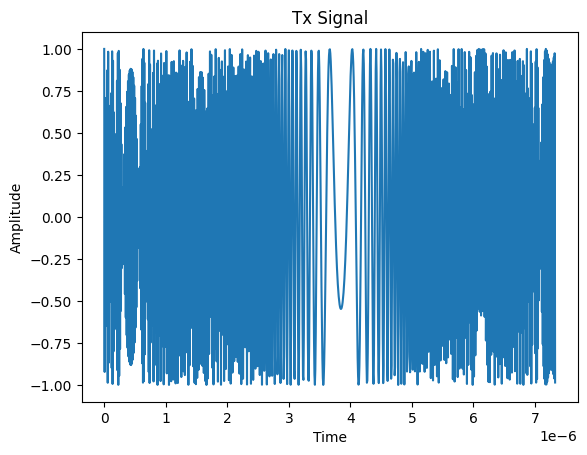

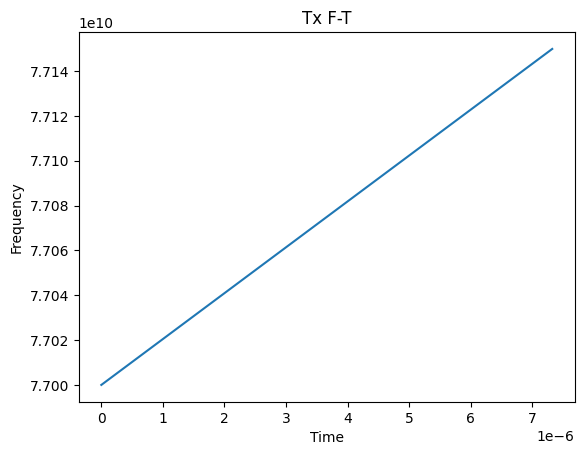

In [42]:
t = np.linspace(0,Nd*Tchirp,Nr*Nd) #Time of Tx and Rx
angle_freq = fc*t+(slope*t*t)/2 #Tx signal angle speed
freq = fc + slope*t #Tx frequency
Tx = np.cos(2*np.pi*angle_freq) #Waveform of Tx


plt.figure()
plt.plot(t[0:1024],Tx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Tx Signal')
plt.show()
plt.figure()
plt.plot(t[0:1024],freq[0:1024])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Tx F-T')
plt.show()

### *Step 3: Signal of Rx*

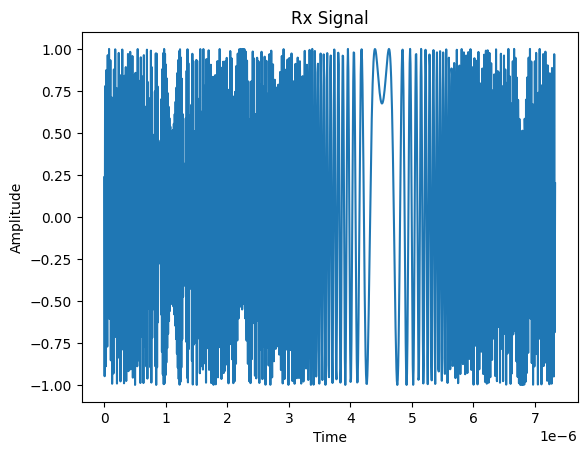

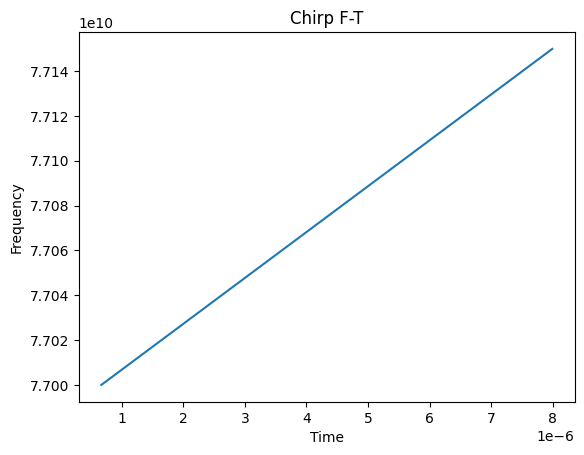

In [43]:
td = 2*r0/c
freqRx = fc + slope*(t)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))

plt.figure()
plt.plot(t[0:1024],Rx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Rx Signal')
plt.show()
plt.figure()
plt.plot(t[0:1024]+td,freqRx[0:1024])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Chirp F-T')
plt.show()


### *Step 4: IF signal*
Intermediate Frequency (IF) signal, which is a carrier wave that has been shifted to a fixed frequency as an intermediate step in transmission or reception

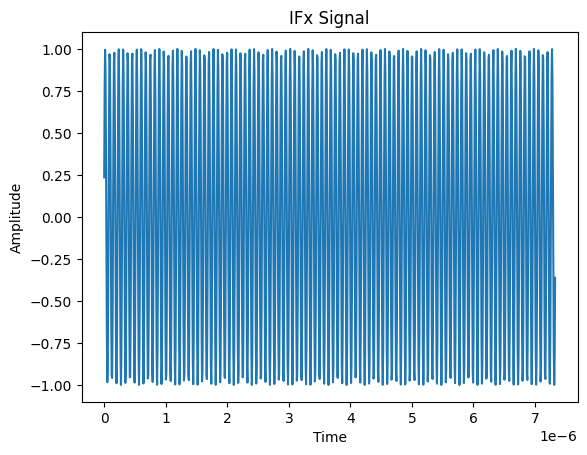

In [44]:
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))

plt.figure()
plt.plot(t[0:1024],IFx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IFx Signal')
plt.show()

### *Step 5: FFT of IF signal*

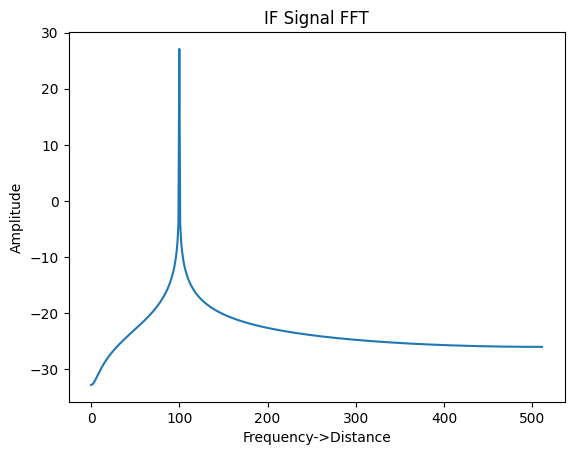

In [45]:
doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
frequency = np.fft.fftfreq(1024, 1/Fs)
range = frequency*c/(2*slope)
plt.figure()
plt.plot(range[0:512],doppler[0:512])
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')
plt.show()

### *Step 6: Spectrogram with time*

C:\Users\me1aman\AppData\Local\Temp\ipykernel_224748\2825713347.py:3: MatplotlibDeprecationWarning: Passing the NFFT parameter of specgram() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.specgram(IFx,1024,Fs)


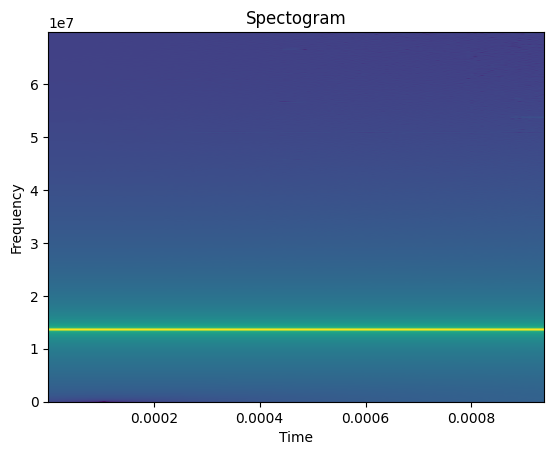

In [46]:
#2D plot
plt.figure()
plt.specgram(IFx,1024,Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram')


plt.show()

# ***Johan Radar application*** 
![alt text](image.png)